# Visão - Trabalho 1

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

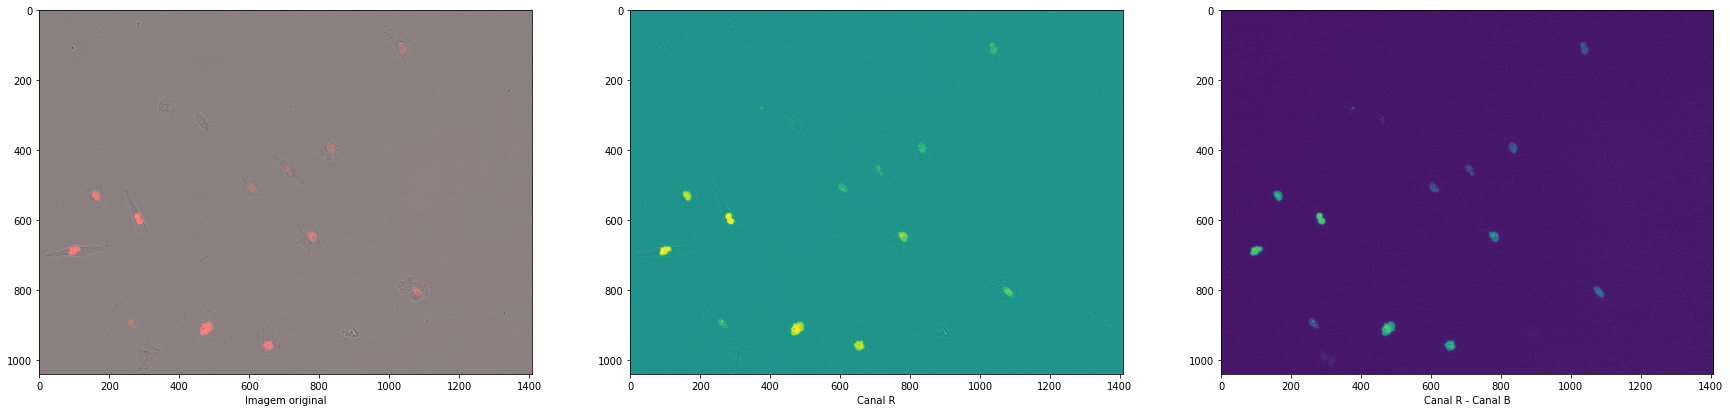

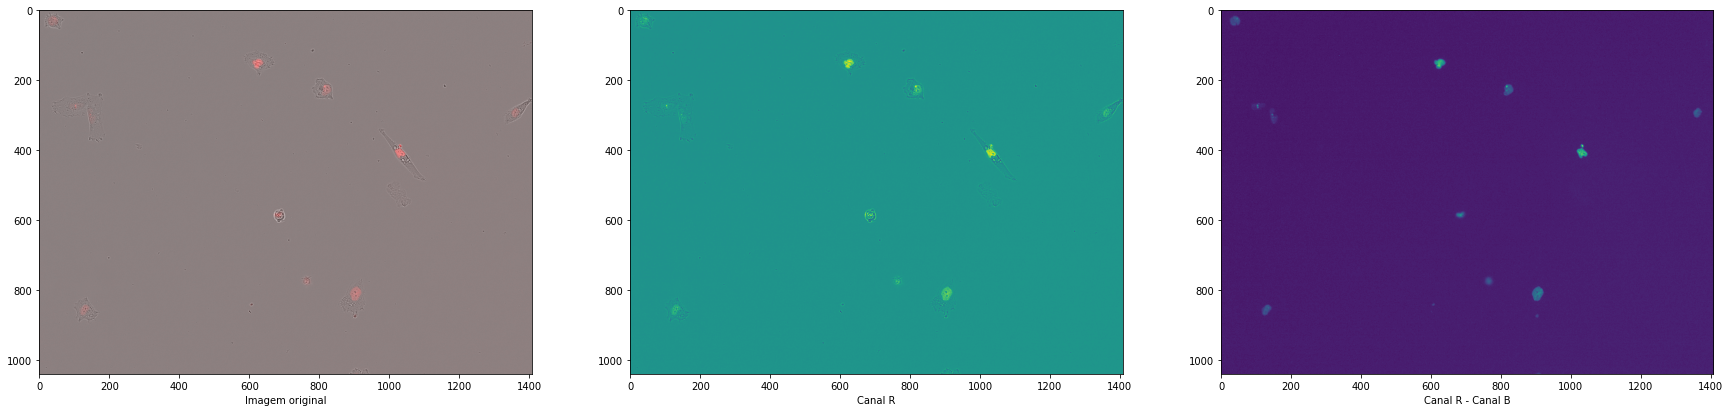

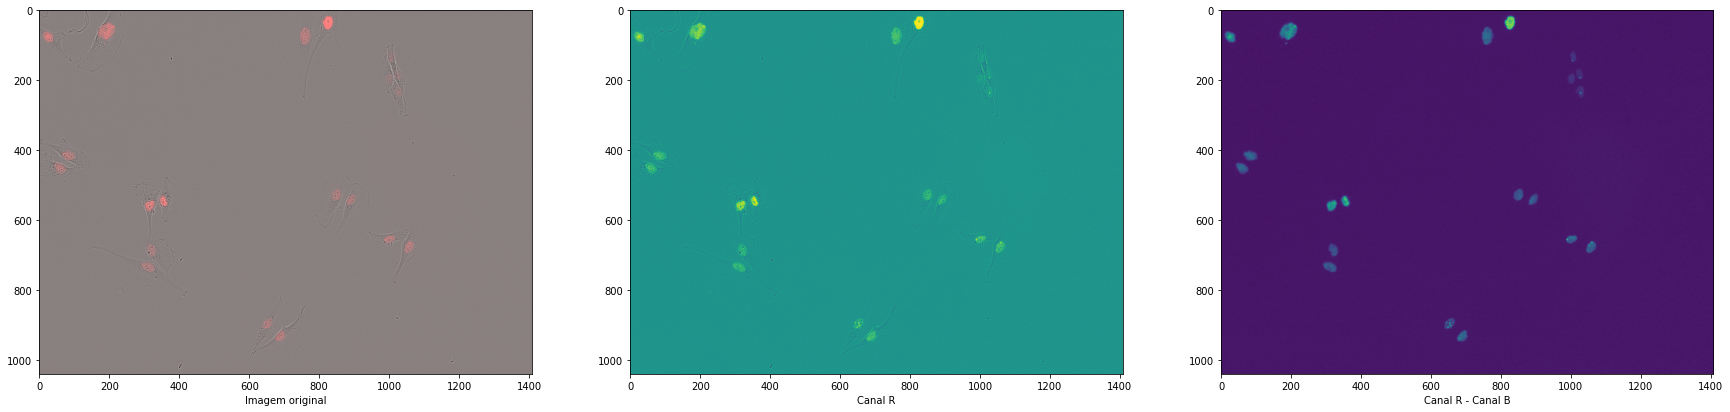

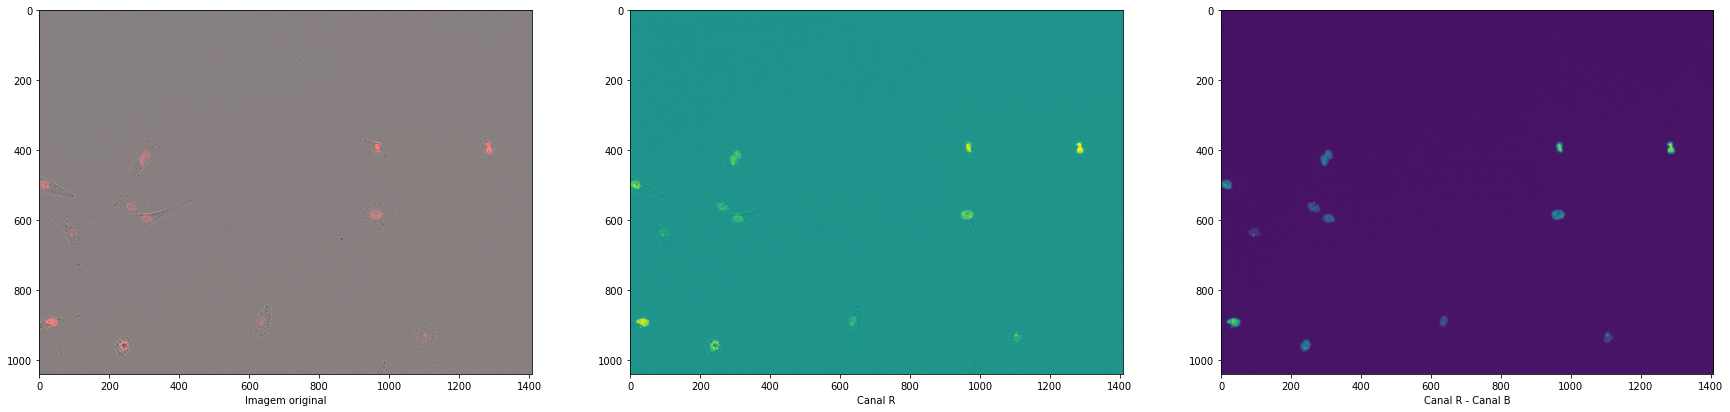

In [2]:

def plot_channels(img_filename):
    img = cv2.imread(img_filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_red = img[:,:,0]
    img_blue = img[:,:,2]

    img_red_minus_blue = img_red - img_blue

    fig = plt.figure(figsize=(30,30))
    
    ax = fig.add_subplot(131)
    ax.set_xlabel("Imagem original")
    ax.imshow(img)


    ax = fig.add_subplot(132)
    ax.set_xlabel("Canal R")
    ax.imshow(img_red)

    ax = fig.add_subplot(133)
    ax.set_xlabel("Canal R - Canal B")
    ax.imshow(img_red_minus_blue)


    plt.title = img_filename
    plt.show()

for filename in ['composite_01.png', 'composite_02.png', 'composite_03.png', 'composite_04.png']:
    plot_channels(filename)

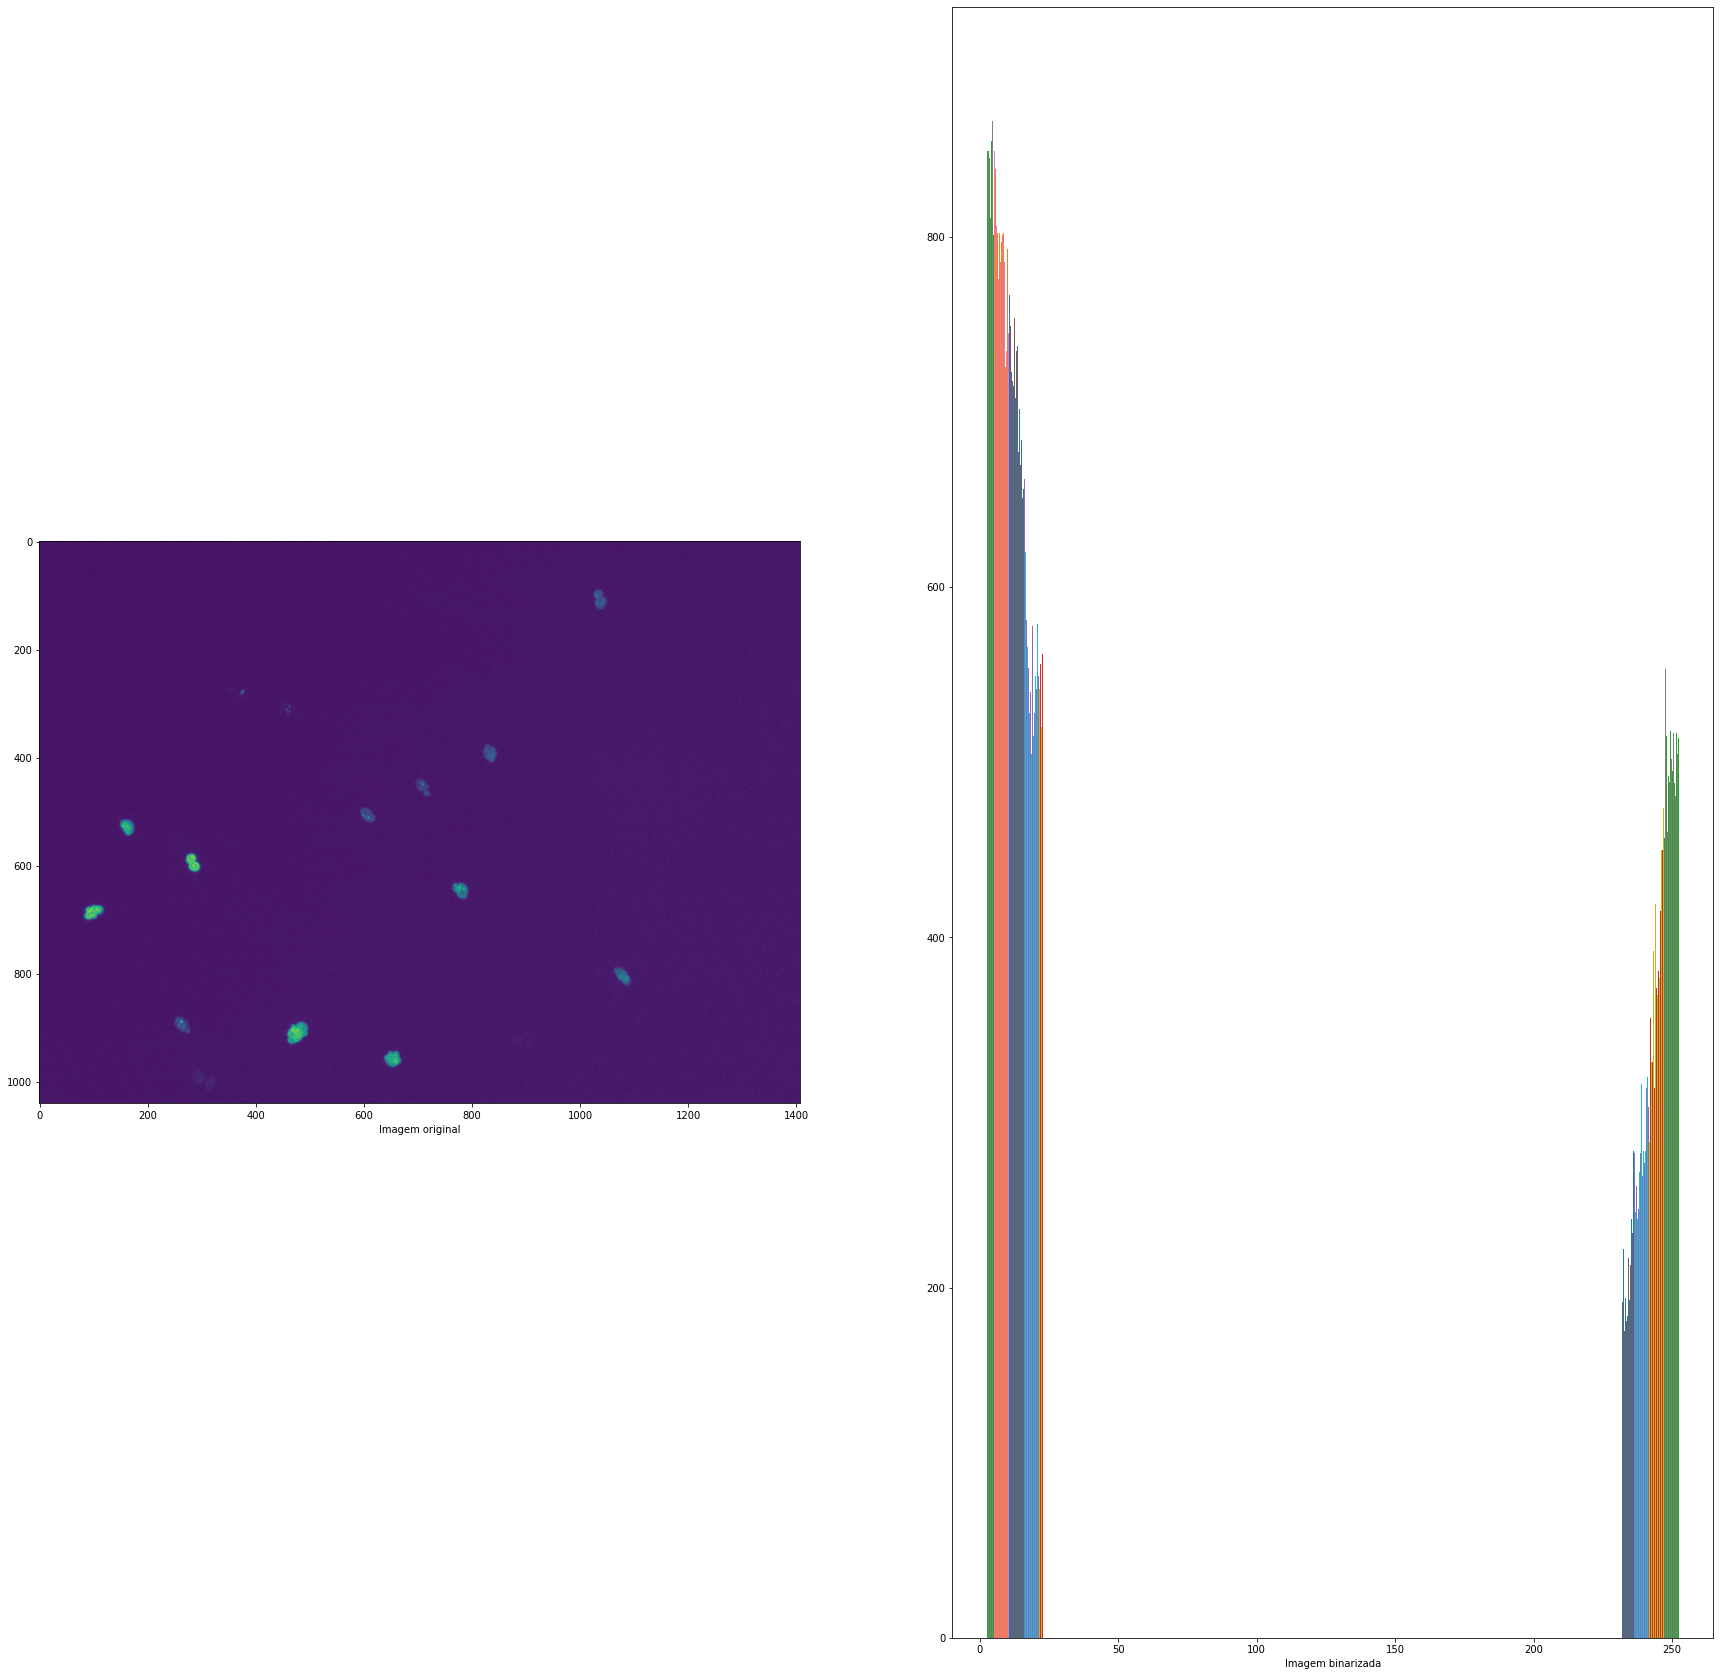


KeyboardInterrupt



In [20]:
def auto_thresholding(img, delta_t = 0.01):
    t = img.mean()
    t_old = t + 2*delta_t

    while abs(t - t_old) > delta_t:
        mean_r1 = np.mean(img, where=(img < t))
        mean_r2 = np.mean(img, where=(img >= t))

        t_old = t
        t = 0.5 * (mean_r1 + mean_r2)

    return t

for filename in ['composite_01.png', 'composite_02.png', 'composite_03.png', 'composite_04.png']:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_red = img[:,:,0]
    img_blue = img[:,:,2]

    img_red_minus_blue = img_red - img_blue
    
    t = auto_thresholding(img_red_minus_blue)
    img_red_minus_blue_bin = np.vectorize(lambda p: 0 if p < t else 255)(img_red_minus_blue)

    fig = plt.figure(figsize=(30,30))
    
    ax = fig.add_subplot(121)
    ax.set_xlabel("Imagem original")
    ax.imshow(img_red_minus_blue)

    ax = fig.add_subplot(122)
    ax.set_xlabel("Imagem binarizada")
    ax.hist(img_red_minus_blue_bin)

    plt.show()
